# Euler's method

Consider the equation
\begin{align}
    \frac{dy}{dx} &= f(x,y) \label{eq1}\tag{1}.
\end{align}
Suppose we know that $(x_0,y_0)$ is a point (given by some initial condition) on the desired solution curve. Then, if we approximate the curve by a straight line passing through $(x_0,y_0)$ and with slope $f(x_0,y_0)$, we can take a small "step" of size $h$ in the $x$-direction and arrive at the nearby point
$$
    (x_1,y_1) = (x_0+h,y_0+f(x_0,y_0)h)
$$
on the same line. If the step size $h$ is sufficiently small, we have that $y_1\approx y(x_1)$, where $x_1=x_0+h$ and $y(x)$ is the desired solution of (1) satisfying $y(x_0)=y_0$. Continuing in this way, we can produce a sequence of points
\begin{align*}
    (x_1,y_1) &= (x_0+h,y_0+f(x_0,y_0)h) \\
    (x_2,y_2) &= (x_1+h,y_1+f(x_1,y_1)h) \\
    (x_3,y_3) &= (x_2+h,y_2+f(x_2,y_2)h) \\
    &\vdots
\end{align*}
which approximate the solution curve.

# Accuracy of numerical approximations

In general, good approximations using Euler's method require a very small step size $h$. For this reason, there exist more sophisticated numerical approximation techniques such as the *Runge-Kutta method*. Indeed, the Runge-Kutta method (which we will not describe here) is one of the methods used by the ``scipy.integrate.odeint`` function from the ``scipy`` package.

Given a list of $x$-values ``x``, a function ``f``$ =y'=f(y, x)$ (note the order of the arguments) and an initial condition ``y0`` $=y(x_0)$, ``odeint(f, y0, x)`` returns a list of $y$-values which approximate the true values $y(x_i)$ for each $x_i\in$ ``x``, where $y(x)$ is the particular solution satisfying the initial condition.

Below, we compare the accuracies of Euler's method and ``odeint`` for the simple equation $y'=y$. Do you notice how Euler's method can lead to cumulative errors?

**Example 1.1** Find a sequence of points $(x_i,y_i)$ which approximate the solution to the initial value problem
$$
    \frac{dy}{dx}=y, \hspace{10mm} y(0)=1
$$
on the interval $[0, 1.5]$.

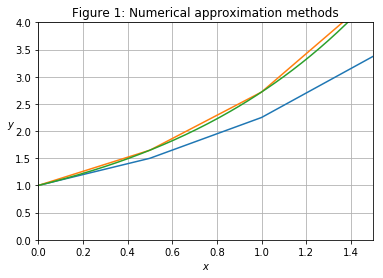

In [2]:
import numpy as np
from scipy.integrate import odeint
from matplotlib import pyplot as plt
%matplotlib inline

def f(y, x): # odeint expects the dependent variable as the first argument
    return y

y0 = 1

x_range = (0, 1.5)
y_range = (0, 4)

#fig, ax = plt.subplots()
#ax.set_aspect('equal')
plt.title('Figure 1: Numerical approximation methods')
plt.grid(True)
plt.xlabel('$x$')
plt.ylabel('$y$').set_rotation(0) # prevents vertical text

# approximation using Euler's method
h = 0.5
x = np.arange(x_range[0], x_range[1] + h, h) # arange returns a half-open interval
y = Euler(f, y0, x)
plt.plot(x, y)

# approximation using odeint
y = odeint(f, y0, x)
plt.plot(x, y)

# analytic solution
h = 0.01
x = np.arange(x_range[0], x_range[1], h)
y = np.exp(x)
plt.plot(x, y)

plt.xlim(x_range)
plt.ylim(y_range)

plt.show()

# Problems

## Problem one

In order to graph the approximation produced by Euler's method and produce Figure 1, the $y$-values `[1, 1.5, 2.25, 3.375]` were hard-coded. Check that these values are correct. Now, write an implementation of Euler's method in Python, that is to say, write a function called ``Euler`` which behaves the same way as `odeint`, but which produces its list of approximate $y$-values using Euler's method.

Replace the line `y = [1, 1.5, 2.25, 3.375]` above with the line `y = Euler(f, 1, x)`. Does the code still work?

Experiment with adjusting the step size in both approximation methods.

In [1]:
def Euler(f, y0, x):
    n = len(x)
    y = [y0]
    for i in range(n-1):
        h = x[i+1] - x[i]
        y.append(y[i] + h*f(y[i],x[i]))
        
    return y

## Problem two

Use the `odeint` function to plot the solution to the initial value problem

$$
    \frac{dy}{dx}=x+\frac{1}{5}y, \hspace{10mm} y(0)=-3
$$

on the interval $[0,5]$.

If you have managed to successfully implement the `Euler` function from Problem 2, plot (on the same graph) the approximate solutions using Euler's method with step sizes $h=1$ and $h=0.1$.

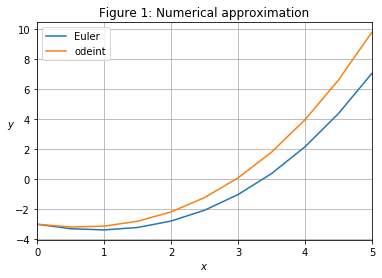

In [3]:
def f(y, x): # odeint expects the dependent variable as the first argument
    return x + y/5

y0 = -3

x_range = (0, 5)
#y_range = (0, 4)

#fig, ax = plt.subplots()
#ax.set_aspect('equal')
plt.title('Figure 1: Numerical approximation')
plt.grid(True)
plt.xlabel('$x$')
plt.ylabel('$y$').set_rotation(0) # prevents vertical text

# approximation using Euler's method
h = 0.5
x = np.arange(x_range[0], x_range[1] + h, h) # arange returns a half-open interval
y = Euler(f, y0, x)
plt.plot(x, y, label='Euler')

# approximation using odeint
y = odeint(f, y0, x)
plt.plot(x, y, label='odeint')

plt.xlim(x_range)
#plt.ylim(y_range)
plt.legend()

plt.show()